In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import multiprocessing
import math
import string
import sdeint
import random
#import superstatistics as ss
import statistics
import scipy.signal
import scipy.stats as st

from scipy.stats import lognorm, expon, rv_continuous, kurtosis, ttest_ind
from scipy import stats,optimize
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy.special import gamma, digamma

from joblib import Parallel, delayed 
from matplotlib import gridspec
from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import accumulate
from collections import Counter
from datetime import datetime,timedelta
from pandas.plotting import register_matplotlib_converters
from PyEMD import EMD
register_matplotlib_converters()

C:\Users\禾森\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\禾森\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Read data from any site
TCaP_data=pd.read_csv('Dataframes\TCaP_data.csv')
#remove zero,negative values
TCaP_data = TCaP_data[TCaP_data['DOO-MGL']>0]
TCaP_data['DATE TIME'] = pd.to_datetime(TCaP_data['DATE TIME'])
#change to float
TCaP_DOO=pd.to_numeric(TCaP_data['DOO-MGL'], errors='coerce')

C:\Users\禾森\AppData\Local\Temp\ipykernel_4952\817724479.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist_lines=sns.distplot(TCaP_DOO, norm_hist=True, kde=True, ax=ax1, label='TCaP')


(array([ 0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

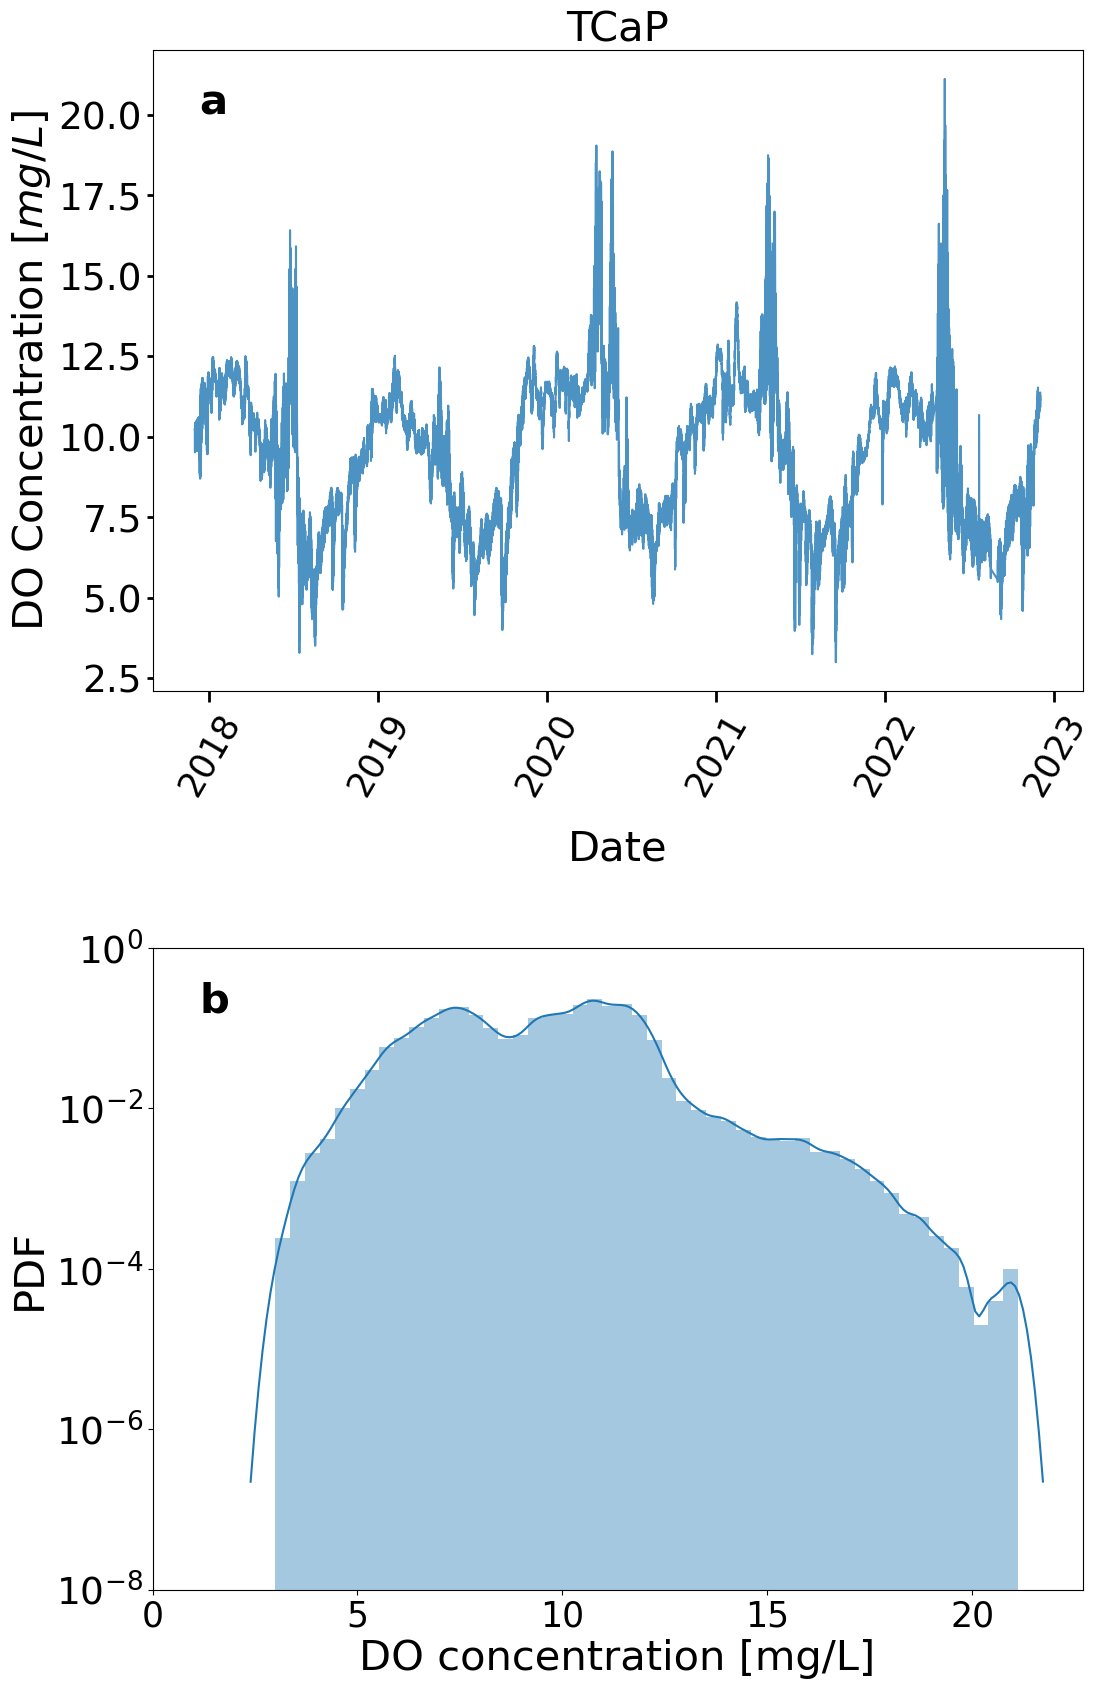

In [5]:
# recreate figures of trajectort and PDF
fig = plt.figure()

# to change size of subplot's
fig.set_figheight(20)
fig.set_figwidth(12)

# create grid for different subplots
spec = gridspec.GridSpec(ncols=1, nrows=2,
						wspace=0.1,hspace=0.4)

ax0 = fig.add_subplot(spec[0])

#extract only the day and month
oneDay=24*2

#plot trajectory
ax0.plot(TCaP_data['DATE TIME'], TCaP_data['DOO-MGL'], alpha=0.8, label='TCaP')

plt.xticks(fontsize=25,rotation=60)
ax0.tick_params(axis='x', length=8, width=2, colors='k')
#y ticks
plt.yticks(fontsize=27)
ax0.tick_params(axis='y', length=4, width=2, colors='k')


ax0.set_ylabel('DO Concentration [$mg/L$]',fontsize=30);
ax0.set_xlabel('Date',fontsize=30, labelpad=20);

ax0.text(0.05, 0.9, string.ascii_lowercase[0], transform=ax0.transAxes,size=30, weight='bold')
#title
ax0.set_title('TCaP',fontsize=30)

#PDF
ax1 = fig.add_subplot(spec[1])

hist_lines=sns.distplot(TCaP_DOO, norm_hist=True, kde=True, ax=ax1, label='TCaP')
(xvalues_hist,yvalues_hist)=hist_lines.get_lines()[0].get_data()
ax1.set_yscale('log')
ax1.set_ylabel('PDF',fontsize=30);
ax1.set_xlim(left=0)
ax1.set_xlabel('DO concentration [mg/L]',fontsize=30);
ax1.text(0.05, 0.9, string.ascii_lowercase[1], transform=ax1.transAxes,size=30, weight='bold')
ax1.set_ylim(top=1, bottom=10**(-8))
plt.yticks(fontsize=27)
plt.xticks(fontsize=25)

#plt.savefig('TCaP_trajectory.pdf',dpi=75,bbox_inches='tight', pad_inches = 0.05)